<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales convolucionales (CNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [71]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [72]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [73]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

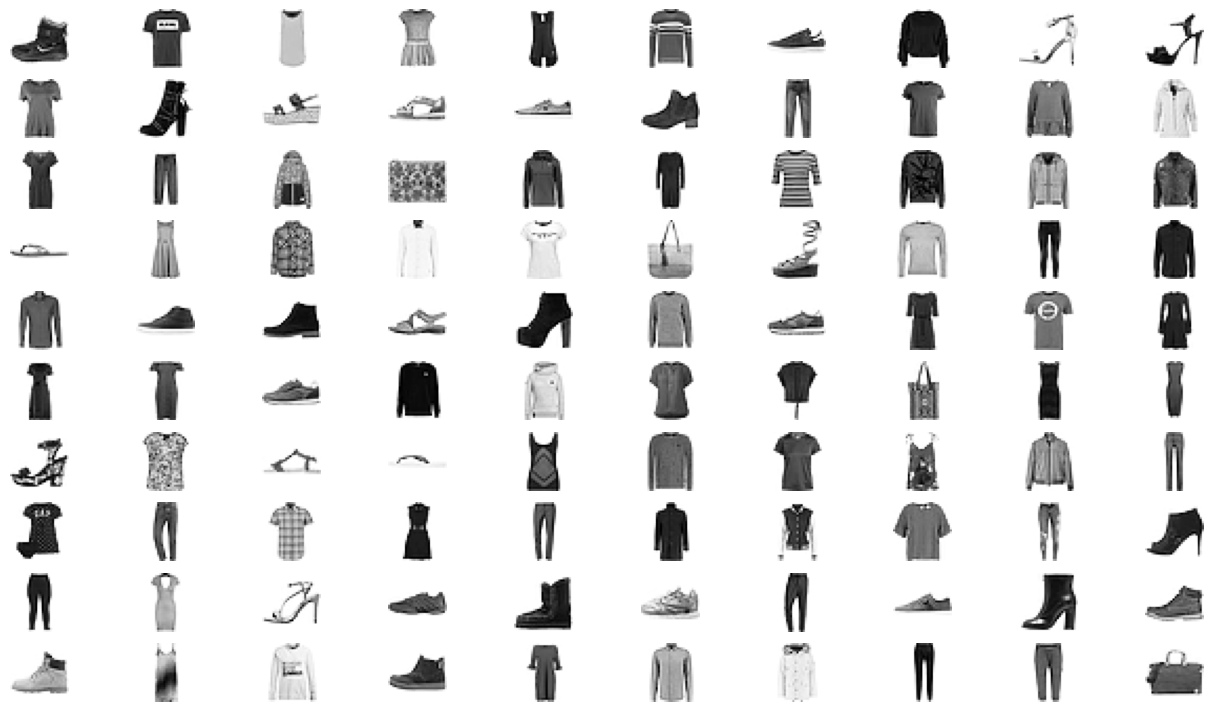

In [74]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

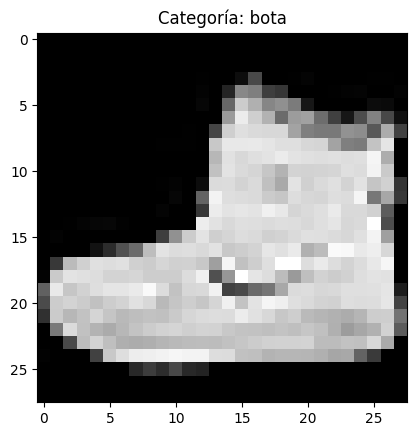

In [75]:
# Alumno, dibuje la primera imagen y su correspondiente categoria
plt.imshow(data_X_train[0], cmap='gray')
plt.title("Categoría: " + category_list[data_y_train[0]])
plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [76]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)
print(data_X_train[0][14, :])

[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


In [77]:
# Alumno: Normalizar los datos entre 0 y 1
X_train_norm = data_X_train / 255
X_test_norm = data_X_test / 255

In [78]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)
print(f'Cantidad de datos en observación:', X_train_norm.shape[0])

Cantidad de datos en observación: 60000


In [79]:
# Alumno: Imprimir la dimension de la imagen
print(f'Las dimensiones de la imagen son:', X_train_norm[0].shape)

Las dimensiones de la imagen son: (28, 28)


In [80]:
# Alumno: En estas imagenes sin escalas de grieses no vienen con el canal especificado
# Deberia ser (28, 28, 1) para poder utilizar en una red CNN
# Agregar el [samples][pixels][width][height]
X_train = X_train_norm.reshape(data_X_train.shape[0], data_X_train.shape[1], data_X_train.shape[2], 1).astype('float32')
X_test = X_test_norm.reshape(data_X_test.shape[0], data_X_test.shape[1], data_X_test.shape[2], 1).astype('float32')
X_train.shape

(60000, 28, 28, 1)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

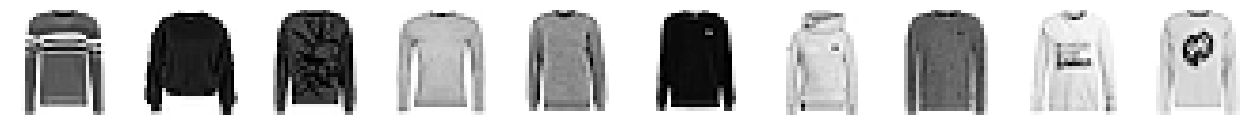

In [81]:
# Alumno: Explor los primeros diez puloveres del dataset de train
fig = plt.figure(figsize=(16,9))

pulover_index = category_list.index("pulover")


#contador
j = 0

# Itera 10 veces
for i in range(10):

    # ax, gráfico que mostrará las imágenes en 1 filas y 10 columnas
    # En cada iteración va ubicando la imagen en la siguiente posición (i+1)
    ax = fig.add_subplot(1, 10, i+1)

    # .axis('off') elimina el recuadro de cada imagen
    ax.axis('off')

    # Bucle que verifica que la imagen sea igual a pulover
    while True:
        if data_y_train[j] == pulover_index:
            # Muestra la imagen con escala de grises
            ax.imshow(X_train_norm[j], cmap='Greys')
            j += 1
            break
        j += 1
plt.show()

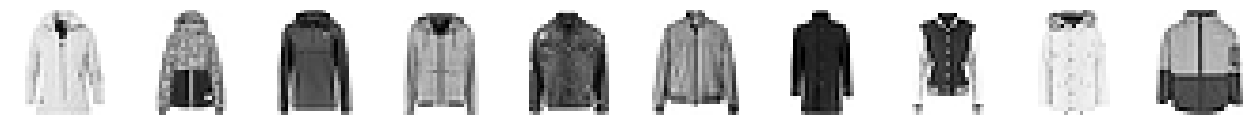

In [82]:
# Alumno: Explor los primeros diez sacos del dataset de train
fig = plt.figure(figsize=(16,9))

saco_index = category_list.index("saco")


#contador
j = 0

# Itera 10 veces
for i in range(10):

    # ax, gráfico que mostrará las imágenes en 1 filas y 10 columnas
    # En cada iteración va ubicando la imagen en la siguiente posición (i+1)
    ax = fig.add_subplot(1, 10, i+1)

    # .axis('off') elimina el recuadro de cada imagen
    ax.axis('off')

    # Bucle que verifica que la imagen sea igual a pulover
    while True:
        if data_y_train[j] == saco_index:
            # Muestra la imagen con escala de grises
            ax.imshow(X_train_norm[j], cmap='Greys')
            j += 1
            break
        j += 1
plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [83]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test
y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)


In [84]:
# input shape
in_shape = X_train.shape[1:]
in_shape

(28, 28, 1)

In [85]:
# output shape
out_shape = y_train.shape[1]
out_shape

10

In [86]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D # Sino funciona este, usar el siguiente
#from keras.layers.convolutional import Conv2D, MaxPooling2D

# Alumno, crear un modelo con la cantidad de capas de CONV y POOL
# que vea que da mejor resultado
model = Sequential()

In [87]:
# Alumno: entrenar el modelo
model.add(Conv2D(filters=8, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=in_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Capa de comunicación entre la red convolucional y la red neuronal
model.add(Flatten())

# Red Neuronal
model.add(Dense(units=64, activation='relu'))

# Capa de salida.
model.add(Dense(units=out_shape, activation='softmax'))

# metricas
model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Resumen de la estructura de la red.
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,274 (395.60 KB)

 Trainable params: 101,274 (395.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7375 - loss: 0.7934 - val_accuracy: 0.8466 - val_loss: 0.4265
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8624 - loss: 0.3957 - val_accuracy: 0.8746 - val_loss: 0.3638
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8778 - loss: 0.3481 - val_accuracy: 0.8802 - val_loss: 0.3425
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8893 - loss: 0.3139 - val_accuracy: 0.8917 - val_loss: 0.3080
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8957 - loss: 0.2896 - val_accuracy: 0.8928 - val_loss: 0.3056
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9032 - loss: 0.2683 - val_accuracy: 0.8967 - val_loss: 0.2961
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9104 - loss: 0.2547 - val_accuracy: 0.9008 - val_loss: 0.2785
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9122 - loss: 0.2458 - val_accuracy: 0.

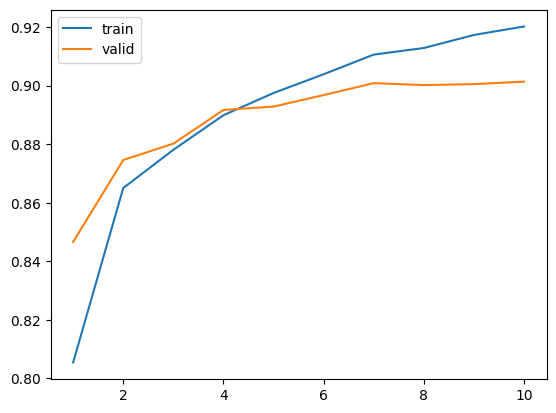

In [88]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [89]:
# Alumno: Predecir las probabilidades del dataset X_test
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.2638751e-06, 4.5003445e-09, 5.3665417e-06, 3.4939092e-07,
        2.4046296e-08, 2.4055403e-04, 3.5319722e-06, 1.1156151e-03,
        2.4418102e-04, 9.9838817e-01],
       [4.6438417e-06, 1.0669727e-10, 9.9962592e-01, 2.3692706e-09,
        3.5198877e-04, 1.9510015e-14, 1.7444119e-05, 4.2619642e-14,
        6.1513511e-10, 2.5312085e-12],
       [3.5413557e-08, 9.9999869e-01, 3.3899816e-10, 9.4711186e-07,
        2.5824164e-07, 6.5385054e-12, 1.4728387e-07, 2.9063753e-11,
        1.6584762e-09, 1.1272657e-12]], dtype=float32)

In [90]:
# Alumno: Transformar las probabilidades en y_hat usando argmax
y_hat = np.argmax(y_hat_prob,axis=1)
y_hat[:3]

array([9, 2, 1])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [91]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8986 - loss: 0.2866


0.8952000141143799

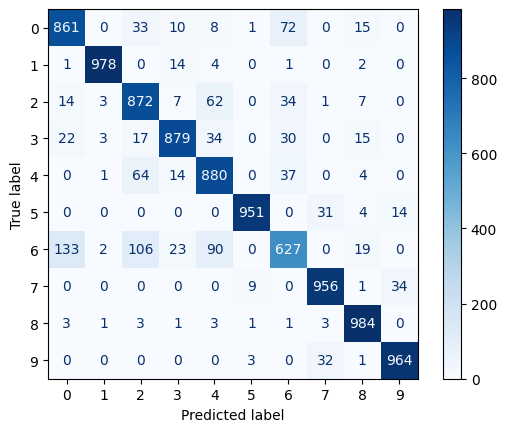

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [93]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [94]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco
X_test_peores = X_test[rank_saco]
y_test_peores = y_test[rank_saco]

In [95]:
# Alumno: Calcular la exactitud de los sacos seleccionados
score = model.evaluate(X_test_peores, y_test_peores)
score[1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.5000 - loss: 1.1398


0.5

In [102]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)
y_hat_prob_peores = model.predict(X_test_peores)

# Ubica de acuerdo a la probabilidad más alta cuál es el número que le corresponde.
y_hat_saco = np.argmax(y_hat_prob_peores,axis=1)
y_hat_saco

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([2, 4, 2, 6, 4, 4, 4, 2, 4, 2])

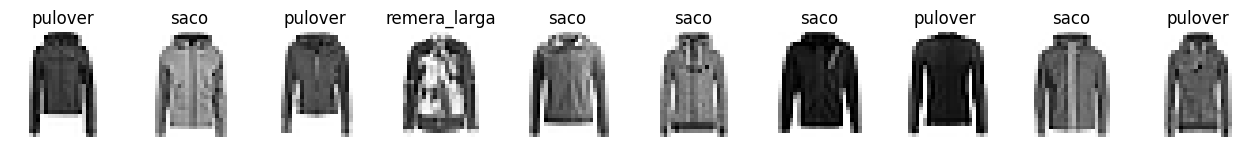

In [103]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría# Espacio para dibujar

# Espacio para dibujar
fig = plt.figure(figsize=(16,9))

# Contador
j = 0

for i in rank_saco:

    # ax, gráfico que mostrará las imágenes en 1 filas y 10 columnas
    # En cada iteración va ubicando la imagen en la siguiente posición (i+1)
    ax = fig.add_subplot(1, 10, j+1)

    # .axis('off') elimina el recuadro de cada imagen
    ax.axis('off')

    # Muestra la imagen en escala de grises
    ax.set_title(category_list[y_hat_saco[j]])

    ax.imshow(X_test_norm[i], cmap='Greys')
    j += 1

plt.show()